In [28]:
import openml
from gplearn.genetic import SymbolicTransformer, SymbolicRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
dataset = openml.datasets.get_dataset(678)

X, y, _, _ = dataset.get_data(dataset_format="dataframe", target=dataset.default_target_attribute)

X.head()

,ozone,radiation,temperature
0,41.0,190,67
1,36.0,118,72
2,12.0,149,74
3,18.0,313,62
4,23.0,299,65


In [30]:
y.head()

0     7.4
1     8.0
2    12.6
3    11.5
4     8.6
Name: wind, dtype: float64

In [31]:
transformer = SymbolicTransformer(generations=40,
                                  population_size=6000,
                                  hall_of_fame=100,
                                  n_components=6,
                                  parsimony_coefficient=0.001,
                                  max_samples=0.2,
                                  verbose=1,
                                  random_state=42,
                                  n_jobs=-1)

transformer.fit(X, y)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    32.94         0.351528       11          0.90593         0.541188      1.13m
   1    16.19         0.473386        7         0.885316         0.526506      1.70m
   2    11.67         0.504902        1         0.924185         0.542007      2.26m
   3     9.66         0.522538       17         0.873254         0.109671      5.43m
   4     8.40         0.535519        1         0.865375         0.532259      5.62m
   5     7.47           0.5528        3         0.889095         0.588232      5.79m
   6     6.67         0.557792       11         0.885352         0.111503      3.62m
   7     5.74         0.568163        5         0.905028         0.466239      1.65m
   8     5.20         0.570422       15         0.873698          0.54741  

SymbolicTransformer(generations=40, max_samples=0.2, n_components=6, n_jobs=-1,
                    population_size=6000, random_state=42, verbose=1)

In [32]:
X_transformed = transformer.transform(X)
X = np.hstack((X, X_transformed))
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8
0,41.0,190.0,67.0,41.0,108.0,0.449664,175.0,0.817073,67.0
1,36.0,118.0,72.0,36.0,108.0,0.500000,180.0,1.000000,72.0
2,12.0,149.0,74.0,12.0,86.0,0.755102,160.0,3.083333,74.0
3,18.0,313.0,62.0,18.0,80.0,0.632653,142.0,1.722222,62.0
4,23.0,299.0,65.0,23.0,88.0,0.585586,153.0,1.413043,65.0


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
est_gp = SymbolicRegressor(
    population_size=6000,
    generations=40,
    p_crossover=0.5,
    p_subtree_mutation=0.2,
    p_hoist_mutation=0.1,
    p_point_mutation=0.2,
    max_samples=0.2,
    verbose=1,
    tournament_size=20,
    parsimony_coefficient=0.0001,
    stopping_criteria=0.01,
    metric='mse',
    n_jobs=-1,
    random_state=42
)

est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    26.95      7.53932e+38        5          7.46913          13.1119     20.28s
   1    15.44      3.53491e+26        5          8.14127           12.951      1.37m
   2     9.83      4.96539e+23        7          3.89289          14.9223      1.52m
   3     7.62      4.42645e+18        7          3.50283          15.0157      1.59m
   4     8.31      3.25451e+44        7          2.36266          13.5729      1.54m
   5     8.18       1.8866e+16        9          2.97192          12.8954      1.51m
   6     8.76      6.53184e+24        5           3.2891          14.1128      1.49m
   7    10.24      8.21713e+22       13           1.8579           10.971      1.45m
   8    12.12       3.1822e+27       43           2.1974          10.6886  

SymbolicRegressor(generations=40, max_samples=0.2, metric='mse', n_jobs=-1,
                  p_crossover=0.5, p_hoist_mutation=0.1, p_point_mutation=0.2,
                  p_subtree_mutation=0.2, population_size=6000, random_state=42,
                  stopping_criteria=0.01, verbose=1)

In [35]:
y_pred_train = pd.Series(est_gp.predict(X_train), index=X_train.index)
y_pred_train.head()

26     9.853021
22     6.447841
31    12.804441
47     8.277015
76     5.785049
dtype: float64

In [36]:
y_train.head()

26    11.5
22     5.7
31    11.5
47     6.3
76     3.4
Name: wind, dtype: float64

In [37]:
y_pred_test = pd.Series(est_gp.predict(X_test), index=X_test.index)
y_pred_test.head()

78     8.045583
10    11.062533
4     10.639900
84     8.040066
64     6.842188
dtype: float64

In [38]:
y_test.head()

78     9.7
10    13.2
4      8.6
84     2.8
64     8.0
Name: wind, dtype: float64

In [39]:
print("R2 Score of train samples whit the model: ", est_gp.score(X_train, y_train))
print("R2 Score of test samples whit the model: ", est_gp.score(X_test, y_test))

R2 Score of train samples whit the model:  0.3129704807056769
R2 Score of test samples whit the model:  0.2533316993821735


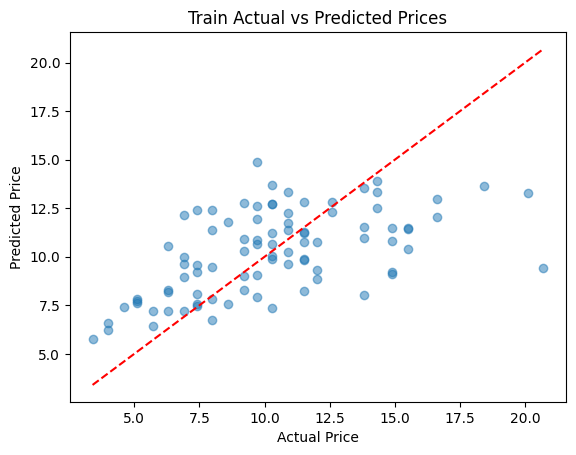

In [40]:
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Train Actual vs Predicted Prices')
plt.show()

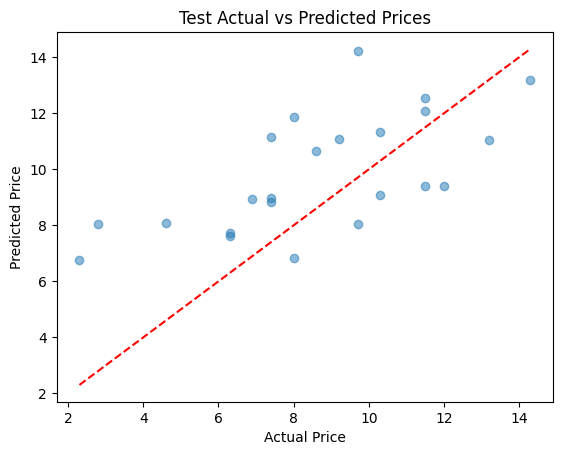

In [41]:
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Test Actual vs Predicted Prices')
plt.show()